In [1]:
import numpy as np
import pandas as pd
import string
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk
from nltk.corpus import stopwords
!pip install contractions
import contractions
from nltk.stem import WordNetLemmatizer
from nltk.corpus import genesis
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
seed = 260758
nltk.download('punkt')
nltk.download('genesis')
nltk.download('stopwords')
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/propaganda_train.tsv', sep='\t')
df_val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/propaganda_val.tsv', sep='\t')

In [4]:
df_1_train = df_train.copy
df_2_val = df_val.copy

In [5]:
df_train.shape

(2414, 2)

In [6]:
df_val.shape

(580, 2)

In [7]:
import re

In [8]:
def text_prep(text):
    #removing contractions
    text = [contractions.fix(word) for word in text.split()]
    text = ' '.join(map(str, text))

    # Tokenization
    text = word_tokenize(text)

    # Removing snippets
    snippets = ['BOS','EOS','”','“']
    text = [word for word in text if word not in snippets]

    # making lowercase
    text = [word.lower() for word in text]

    # Removing punctuation
    punctuation = string.punctuation
    text = [word for word in text if word not in punctuation]

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]

    # Join tokens into a string
    return ' '.join(text)

#this function for this preprocessing is adapted from code available at:
#https://medium.com/@maleeshadesilva21/preprocessing-steps-for-natural-language-processing-nlp-a-beginners-guide-d6d9bf7689c9



In [9]:
df_train['tagged_in_context_processed'] = df_train['tagged_in_context'].apply(text_prep)
df_val['tagged_in_context_processed'] = df_val['tagged_in_context'].apply(text_prep)

df_train.head()

,label,tagged_in_context,tagged_in_context_processed
0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed.",confirmed
1,not_propaganda,This declassification effort <BOS> won’t make ...,declassification effort make things worse pres...
2,flag_waving,The Obama administration misled the <BOS> Amer...,obama administration misled american people co...
3,not_propaganda,“It looks like we’re capturing the demise of t...,looks like capturing demise dark vortex differ...
4,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>",location westerville ohio


In [10]:
df_val.head()

,label,tagged_in_context,tagged_in_context_processed
0,not_propaganda,"On average, between 300 and 600 infections are...",average 300 600 infections recorded every year...
1,causal_oversimplification,Mostly because <BOS> the country would not las...,mostly country would last long without outside...
2,appeal_to_fear_prejudice,Lyndon Johnson <BOS> gets Earl Warren and Sen....,lyndon johnson gets earl warren sen. richard r...
3,not_propaganda,<BOS> You <EOS> may opt out at anytime.,may opt anytime
4,repetition,It must be exacted from him directly in order ...,must exacted directly order vilify humiliate i...


<Axes: ylabel='label'>

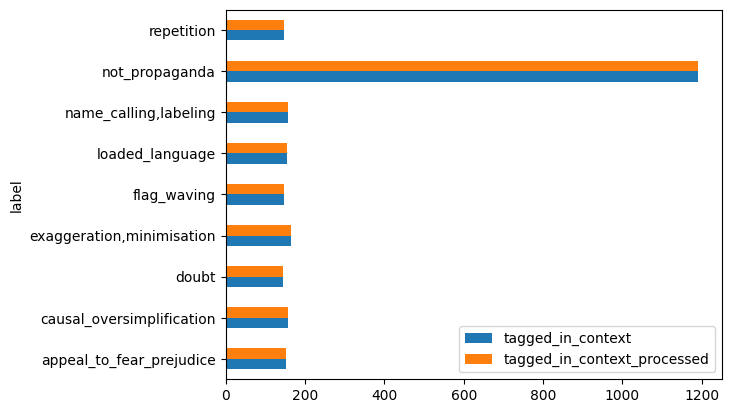

In [11]:
df_train.groupby('label').count().plot(kind='barh')

In [12]:
#making propaganda and not_propaganda label for binary classification
def label_process(label):
    if label != 'not_propaganda':
        return 'propaganda'
    else:
        return label
df_train['label'] = df_train['label'].apply(label_process)
df_val['label'] = df_train['label'].apply(label_process)


In [13]:
print(df_train['label'].unique())

['not_propaganda' 'propaganda']


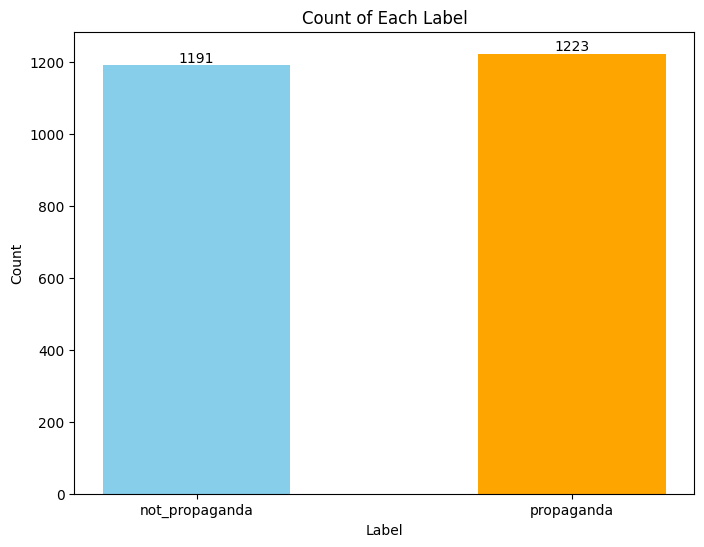

In [14]:
labels_train=df_train.groupby('label').count()
# Setting the figure size
plt.figure(figsize=(8, 6))
# Creating the bar plot
bars = plt.bar(labels_train.index, labels_train['tagged_in_context'], color=['skyblue', 'orange'], width=0.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each Label')
plt.show()

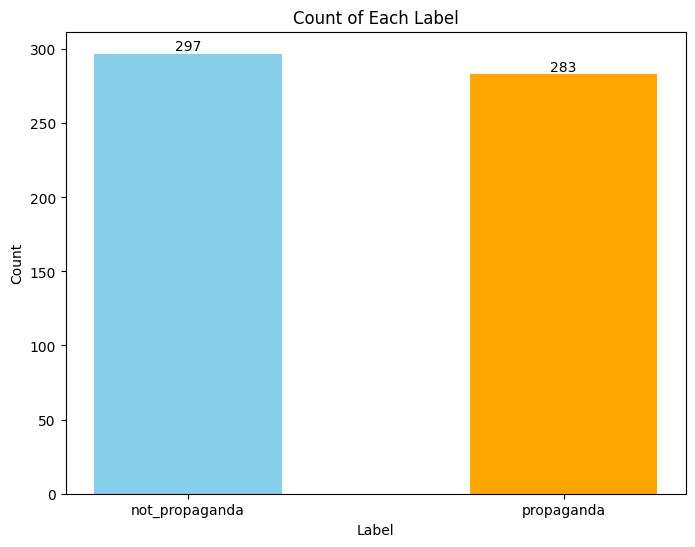

In [15]:
labels_val=df_val.groupby('label').count()
# Setting the figure size
plt.figure(figsize=(8, 6))
# Creating the bar plot
bars = plt.bar(labels_val.index, labels_val['tagged_in_context'], color=['skyblue', 'orange'], width=0.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each Label')
plt.show()

In [16]:
# Splitting data for training and testing
df_train, df_test = train_test_split(df_train, test_size=0.2, random_state=seed)
df_test

,label,tagged_in_context,tagged_in_context_processed
1959,not_propaganda,North Korea will seemingly <BOS> halt its miss...,north korea seemingly halt missile tests
1856,not_propaganda,She was there as a <BOS> presenter at the <EOS...,presenter middle east institute speech hanan a...
272,propaganda,<BOS> The West falls as it fails to see Europe...,west falls fails see europe overrun ''
826,propaganda,Wills’ peaceful fantasy Qur’an raises one mass...,wills ’ peaceful fantasy qur ’ raises one mass...
1735,propaganda,She also admits ongoing discussions among thes...,also admits ongoing discussions among people m...
...,...,...,...
1177,propaganda,This kind of behavior is not acceptable for an...,kind behavior acceptable anyone civilized soci...
2125,not_propaganda,What might <BOS> be this “generous response?” ...,might generous response pope francis give exam...
1381,not_propaganda,"The accuser’s name is Christine Blasey Ford, a...",accuser ’ name christine blasey ford registere...
829,propaganda,"Yet, from the very beginning, <BOS> the mainst...",yet beginning mainstream media never given ser...


**Task 1.1 - Binary Classification - (GloVe + NN) Model**

In [17]:
from gensim.models import KeyedVectors
import gensim.downloader as api
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from torch import nn
from transformers import BertTokenizer, BertModel
from torch.optim import Adam
from tqdm import tqdm
import gc
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [18]:
# loading the pre-trained glove model
glove_model = api.load('glove-wiki-gigaword-50')

# word embedding funtion to convert a sentence into a vector representation
def word_embedding(sentence, model):
    words = sentence.split()
    embedding = np.zeros((model.vector_size,))
    count = 0
    for word in words:
        if word in model.key_to_index:
            embedding += model.get_vector(word)
            count += 1
    if count > 0:
        embedding /= count
    return embedding

# Transforming the text data into word embeddings
X_train = [word_embedding(sentence, glove_model) for sentence in df_train['tagged_in_context_processed']]
X_test = [word_embedding(sentence, glove_model) for sentence in df_test['tagged_in_context_processed']]
y_train = df_train['label']
y_test = df_test['label']

# this function is adapted from code available at: 
#https://www.geeksforgeeks.org/pre-trained-word-embedding-using-glove-in-nlp-models/
#and https://radimrehurek.com/gensim/models/word2vec.html and


[==================================================] 100.0% 66.0/66.0MB downloaded


In [19]:
# Encoding the training labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [20]:
# Defining the neural network
#this function is adapted from code from Lab 10 solutions and also adapted from the code
#the available at:https://blog.paperspace.com/training-validation-and-accuracy-in-pytorch/
class GloVE_NN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GloVE_NN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

# Converting training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train).float()
X_test_tensor = torch.tensor(X_test).float()
y_train_tensor = torch.tensor(y_train_encoded).long()
y_test_tensor = torch.tensor(y_test_encoded).long()

# Define hyperparameters
input_size = 50 #X_train_tensor.shape[1]
hidden_size = 128
output_size = 2  # Number of classes

# Initialize the model, loss function, and optimizer
model = GloVE_NN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
batch_size = 42
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluating the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.numpy()
    accuracy_ffnn = accuracy_score(y_test_encoded, predicted)
    print(f'Accuracy: {accuracy_ffnn}')
    report_ffnn = classification_report(y_test_encoded, predicted, target_names=label_encoder.classes_)
    print(f'Feed-Forward Neural Network Classifier Report using GloVE:\n{report_ffnn}')





Epoch [1/20], Loss: 0.6910
Epoch [2/20], Loss: 0.6348
Epoch [3/20], Loss: 0.6283
Epoch [4/20], Loss: 0.5730
Epoch [5/20], Loss: 0.5673
Epoch [6/20], Loss: 0.5787
Epoch [7/20], Loss: 0.5577
Epoch [8/20], Loss: 0.5864
Epoch [9/20], Loss: 0.5575
Epoch [10/20], Loss: 0.5340
Epoch [11/20], Loss: 0.5312
Epoch [12/20], Loss: 0.5406
Epoch [13/20], Loss: 0.5458
Epoch [14/20], Loss: 0.5701
Epoch [15/20], Loss: 0.5519
Epoch [16/20], Loss: 0.5237
Epoch [17/20], Loss: 0.5574
Epoch [18/20], Loss: 0.5132
Epoch [19/20], Loss: 0.6064
Epoch [20/20], Loss: 0.6205
Accuracy: 0.7142857142857143
Feed-Forward Neural Network Classifier Report using GloVE:
                precision    recall  f1-score   support

not_propaganda       0.73      0.71      0.72       249
    propaganda       0.70      0.72      0.71       234

      accuracy                           0.71       483
     macro avg       0.71      0.71      0.71       483
  weighted avg       0.71      0.71      0.71       483



**Task 1.2 - Binary Classification - (BERT + NN)Model**

In [21]:
torch.manual_seed(seed)

#Cuda algorithms
torch.backends.cudnn.deterministic = True

#Clearing CUDA cache to free up memory
torch.cuda.empty_cache()

#checking GPU availability
use_cuda = torch.cuda.is_available()

if use_cuda:
    print("GPU acceleration enabled")
else:
    print("GPU acceleration NOT enabled. If using Colab, have you changed the runtime type and selected GPU as the hardware accelerator?")

device = torch.device("cuda" if use_cuda else "cpu")
print(device)

#this code is adapted from code from Lab 10

GPU acceleration enabled
cuda


In [22]:
binary_labels = {label: i for i, label in enumerate(df_train['label'].sort_values().unique().tolist())}

binary_label_reverse ={v:k for (k,v) in binary_labels.items()}
binary_label_reverse

{0: 'not_propaganda', 1: 'propaganda'}

In [23]:
# This is adapted from the Advanced NLP Lab 10 Solutions
# dataset for training, validation and testing to load
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df, label_dict, column='tagged_in_context_processed'):
        self.labels = [label_dict[label] for label in df['label']]
        self.texts = [tokenizer.encode_plus(text.lower(), padding='max_length', max_length=512, truncation=True, return_tensors="pt") for text in df[column]]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        return self.texts[idx]

    def __getitem__(self, idx):
        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [24]:
#preparing inputs for classification
def prepare_inputs(input1, label, device):
    label = label.to(device)
    mask = input1['attention_mask'].to(device)
    input_id = input1['input_ids'].squeeze(1).to(device)
    return (input_id, mask, label)

In [25]:
#this code is adapted from the Lab 10 Solutions
class BertBinaryClassifier(nn.Module):

    def __init__(self,dropout=0.5,num_classes=2):

        super(BertBinaryClassifier,self).__init__()

        self.bert=BertModel.from_pretrained('bert-base-uncased')
        self.dropout=nn.Dropout(dropout)
        self.linear=nn.Linear(768,num_classes)
        self.relu=nn.ReLU()

    def forward(self,input_id,mask):

        last_hidden_layer,pooled_output = self.bert(input_ids=input_id,attention_mask=mask,return_dict=False)
        dropout_output=self.dropout(pooled_output)
        linear_output=self.linear(dropout_output)
        final_layer=self.relu(linear_output)

        return final_layer

In [26]:
#this code is adapted from the Lab 10 Solutions
def train(model, train_data,val_data,learning_rate,epochs, batch_size=2):

    train_dataloader=torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True)
    val_dataloader=torch.utils.data.DataLoader(val_data,batch_size=2)

    use_cuda=torch.cuda.is_available()
    device=torch.device("cuda" if use_cuda else "cpu")

    criterion=nn.CrossEntropyLoss()
    optimizer=Adam(model.parameters(),lr=learning_rate)

    if use_cuda:
        model=model.cuda()
        criterion=criterion.cuda()

    for epoch_num in range(epochs):
        total_acc_train=0
        total_loss_train=0
        model.train()
        for train_input,train_label in tqdm(train_dataloader):

            input_id,mask, train_label=prepare_inputs(train_input,train_label,device)

            output=model(input_id,mask)

            batch_loss=criterion(output,train_label.long())
            total_loss_train +=batch_loss.item()

            acc=(output.argmax(dim=1)==train_label).sum().item()
            total_acc_train+=acc

            model.zero_grad()
            batch_loss.backward()
            optimizer.step()

        total_acc_val=0
        total_loss_val=0
        model.eval()
        with torch.no_grad():
            for val_input,val_label in val_dataloader:

                input_id,mask, val_label=prepare_inputs(val_input,val_label,device)

                output=model(input_id,mask)

                batch_loss=criterion(output,val_label.long())

                total_loss_val+=batch_loss.item()

                acc=(output.argmax(dim=1)==val_label).sum().item()
                total_acc_val+=acc

        print(f'Epochs: {epoch_num+1} | Train Loss: {total_loss_train / len(train_data):.3f} | Train Accuracy: {total_acc_train/len(train_data):.3f}')
        print(f'Val loss: {total_loss_val/len(val_data):.3f} | Val Accuracy: {total_acc_val / len(val_data):.3f}')

In [27]:
batchsize=4
#this code is adapted from the lab 10 Solutions
def evaluate(model,test_dataset,batchsize=4):
    model.eval()
    test_dataloader=torch.utils.data.DataLoader(test_dataset,batch_size=batchsize)

    use_cuda=torch.cuda.is_available()
    device=torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:
        model=model.cuda()

    total_acc_test=0
    with torch.no_grad():
        count=0
        predictions=[]
        for test_input,test_label in tqdm(test_dataloader):
            count+=batchsize
            test_label=test_label.to(device)
            mask=test_input['attention_mask'].to(device)
            input_id=test_input['input_ids'].squeeze(1).to(device)
            output=model(input_id,mask)
            #print(output.argmax(dim=1),test_label)
            predictions.append(output.argmax(dim=1))  #save the prediction for further analysis
            acc=(output.argmax(dim=1)==test_label).sum().item()

            total_acc_test+=acc
            if count%100==0:
                print(f'Accuracy so far = {total_acc_test/count: .3f}')

    print(f'Test accuracy: {total_acc_test/len(test_dataset): .3f}')
    return predictions, (total_acc_test/len(test_dataset))

In [28]:
df_train_bert_binary = df_train[['tagged_in_context_processed', 'label']].copy()
df_test_bert_binary = df_test[['tagged_in_context_processed', 'label']].copy()
df_validation_bert_binary = df_val[['tagged_in_context_processed', 'label']].copy()

train_data_bert_binary = Dataset(df_train_bert_binary, binary_labels)
test_data_bert_binary = Dataset(df_test_bert_binary, binary_labels)
validation_data_bert_binary = Dataset(df_validation_bert_binary, binary_labels)

In [29]:
EPOCHS=2
bert_binary_classifier=BertBinaryClassifier(num_classes=len(binary_labels.keys()))
LR=1e-5

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [30]:
train(bert_binary_classifier,train_data_bert_binary,validation_data_bert_binary,LR,EPOCHS)

100%|██████████| 966/966 [03:21<00:00,  4.80it/s]


Epochs: 1 | Train Loss: 0.312 | Train Accuracy: 0.642
Val loss: 0.414 | Val Accuracy: 0.510


100%|██████████| 966/966 [03:23<00:00,  4.74it/s]


Epochs: 2 | Train Loss: 0.229 | Train Accuracy: 0.802
Val loss: 0.564 | Val Accuracy: 0.528


In [31]:
predictions, acc=evaluate(bert_binary_classifier, test_data_bert_binary, 1)

 22%|██▏       | 104/483 [00:03<00:13, 28.62it/s]

Accuracy so far =  0.740


 42%|████▏     | 203/483 [00:07<00:09, 29.01it/s]

Accuracy so far =  0.725


 63%|██████▎   | 305/483 [00:10<00:06, 28.82it/s]

Accuracy so far =  0.740


 84%|████████▎ | 404/483 [00:13<00:02, 28.96it/s]

Accuracy so far =  0.735


100%|██████████| 483/483 [00:16<00:00, 28.90it/s]

Test accuracy:  0.727


In [32]:
from sklearn.metrics import classification_report

predicted_labels = [ binary_label_reverse[y.item()] for y in predictions]
print(classification_report(df_test_bert_binary['label'], predicted_labels))

                precision    recall  f1-score   support

not_propaganda       0.72      0.76      0.74       249
    propaganda       0.73      0.69      0.71       234

      accuracy                           0.73       483
     macro avg       0.73      0.73      0.73       483
  weighted avg       0.73      0.73      0.73       483



**Task - 2.1: Multiclass Classification -(GloVe-LSTM Model)**

In [33]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/propaganda_train.tsv', sep='\t')
val_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/propaganda_val.tsv', sep='\t')

In [34]:
train_data_multi,test_data_multi=train_test_split(train_df,test_size=0.2,random_state=seed)
train_data_multi_prop=train_data_multi[train_data_multi['label']!='not_propaganda']
test_data_multi_prop=test_data_multi[test_data_multi['label']!='not_propaganda']
val_data_multi_prop=val_df[val_df['label']!='not_propaganda']

In [35]:
train_data_multi_prop=train_data_multi_prop[['tagged_in_context','label']]
test_data_multi_prop=test_data_multi_prop[['tagged_in_context','label']]
test_data_multi_prop.head(10)

,tagged_in_context,label
272,<BOS> The West falls as it fails to see Europe...,appeal_to_fear_prejudice
826,Wills’ peaceful fantasy Qur’an raises one mass...,doubt
1735,She also admits ongoing discussions among thes...,"exaggeration,minimisation"
1004,"SMITH: “<BOS> You whip ’em up. The poor, the m...","exaggeration,minimisation"
592,"Of that book, no less than Robert Royal—signal...","name_calling,labeling"
1533,"During the trial, former vice presidential can...",appeal_to_fear_prejudice
2035,<BOS> No sane person is saying that the West s...,doubt
596,"<BOS> Israel has hypnotized the world <EOS>, m...","exaggeration,minimisation"
21,We’ve caught on to his <BOS> sneaky <EOS> syno...,loaded_language
2058,On on the Jewish people: “<BOS> You are wicked...,flag_waving


In [36]:
#multiclass labels
multi_class_labels = {label:i for i,label in enumerate(train_data_multi_prop['label'].sort_values().unique().tolist())}
reverse_index_multi_class_label ={v:k for (k,v) in multi_class_labels.items()}
multi_class_labels

{'appeal_to_fear_prejudice': 0,
 'causal_oversimplification': 1,
 'doubt': 2,
 'exaggeration,minimisation': 3,
 'flag_waving': 4,
 'loaded_language': 5,
 'name_calling,labeling': 6,
 'repetition': 7}

In [37]:
def extract_snippet(sent):
    start=sent.find("<BOS")+len("<BOS>")
    end=sent.find("<EOS>")
    return sent[start:end].strip()
train_data_multi_prop['snippet_text']=train_data_multi_prop['tagged_in_context'].apply(extract_snippet)

In [38]:
train_data_multi_prop['snippet_length']=train_data_multi_prop['snippet_text'].apply(lambda x:len(x.split()))

In [39]:
test_data_multi_prop['snippet_text']=test_data_multi_prop['tagged_in_context'].apply(extract_snippet)
test_data_multi_prop['snippet_length']=test_data_multi_prop['snippet_text'].apply(lambda x:len(x.split()))

In [40]:
val_data_multi_prop['snippet_text']=val_data_multi_prop['tagged_in_context'].apply(extract_snippet)
val_data_multi_prop['snippet_length']=val_data_multi_prop['snippet_text'].apply(lambda x:len(x.split()))

In [41]:
val_data_multi_prop.head()

,label,tagged_in_context,snippet_text,snippet_length
1,causal_oversimplification,Mostly because <BOS> the country would not las...,the country would not last long without an out...,16
2,appeal_to_fear_prejudice,Lyndon Johnson <BOS> gets Earl Warren and Sen....,gets Earl Warren and Sen. Richard Russel to jo...,24
4,repetition,It must be exacted from him directly in order ...,infidels,1
5,"name_calling,labeling",Is it any wonder that priests and laity alike ...,"the ""gay lifestyle",3
6,loaded_language,Health workers have been asked to work with co...,devastating communities,2


In [42]:
train_data_multi_prop['processed_text']=train_data_multi_prop['snippet_text'].apply(text_prep)
test_data_multi_prop['processed_text']=test_data_multi_prop['snippet_text'].apply(text_prep)
val_data_multi_prop['processed_text']=val_data_multi_prop['snippet_text'].apply(text_prep)


In [43]:
test_data_multi_prop.head()

,tagged_in_context,label,snippet_text,snippet_length,processed_text
272,<BOS> The West falls as it fails to see Europe...,appeal_to_fear_prejudice,The West falls as it fails to see Europe being...,11,west falls fails see europe overrun
826,Wills’ peaceful fantasy Qur’an raises one mass...,doubt,if the Islamic holy book is really as peaceful...,28,islamic holy book really peaceful benign garry...
1735,She also admits ongoing discussions among thes...,"exaggeration,minimisation",Trump crushed her on election day,6,trump crushed election day
1004,"SMITH: “<BOS> You whip ’em up. The poor, the m...","exaggeration,minimisation","You whip ’em up. The poor, the middle income. ...",24,whip poor middle income whip frenzy order vote
592,"Of that book, no less than Robert Royal—signal...","name_calling,labeling","a power-hungry, manipulative dictator, [who] c...",11,power-hungry manipulative dictator celebrated ...


In [44]:
#calculating the mean word vector representation of a list of tokens
def word_vectorization(tokens, glove_model):
    word_vectors = [glove_model[word] for word in tokens if word in glove_model]
    mean_word_vector = np.mean(word_vectors, axis=0) if word_vectors else np.zeros(glove_model.vector_size)
    return mean_word_vector

In [45]:
train_data_multi_prop['word_vectors'] = train_data_multi_prop['processed_text'].apply(lambda x: word_vectorization(x, glove_model))
test_data_multi_prop['word_vectors'] = test_data_multi_prop['processed_text'].apply(lambda x: word_vectorization(x, glove_model))
val_data_multi_prop['word_vectors'] = val_data_multi_prop['processed_text'].apply(lambda x: word_vectorization(x, glove_model))

In [46]:
train_data_multi_prop['tagged_in_context_processed']=train_data_multi_prop['tagged_in_context'].apply(text_prep)
test_data_multi_prop['tagged_in_context_processed']=test_data_multi_prop['tagged_in_context'].apply(text_prep)
val_data_multi_prop['tagged_in_context_processed']=val_data_multi_prop['tagged_in_context'].apply(text_prep)

In [47]:
train_data_multi_prop['word_vectors_processed'] = train_data_multi_prop['tagged_in_context_processed'].apply(lambda x: word_vectorization(x, glove_model))
val_data_multi_prop['word_vectors_processed'] = val_data_multi_prop['tagged_in_context_processed'].apply(lambda x: word_vectorization(x, glove_model))
test_data_multi_prop['word_vectors_processed'] = test_data_multi_prop['tagged_in_context_processed'].apply(lambda x: word_vectorization(x, glove_model))


In [48]:
#this code is adapted from lab 10 solutions
#also adapted from the code avilable at: 
#https://nzlul.medium.com/the-classification-of-text-messages-using-lstm-bi-lstm-and-gru-f79b207f90ad
class LSTMMultiClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, dropout=0.6):
        super(LSTMMultiClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout = nn.Dropout(dropout)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim=1)
        x = x.unsqueeze(1)
        lstm_out, _ = self.lstm(x)
        x = lstm_out[:, -1, :]
        x = self.dropout(x)
        x = self.fc(x)
        return x


In [49]:
class GloveEmbeddedMultiClassDataset(torch.utils.data.Dataset):
    def __init__(self, df, label_dict, context_column='word_vectors_processed', span_column='word_vectors'):
        self.labels = torch.tensor([label_dict[label] for label in df['label']], dtype=torch.long)
        self.context_texts = [torch.tensor(text, dtype=torch.float32) for text in df[context_column]]
        self.span_texts = [torch.tensor(text, dtype=torch.float32) for text in df[span_column]]

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'context': self.context_texts[idx],
            'span': self.span_texts[idx],
            'label': self.labels[idx]
        }
    
#this code is adapted from the Lab 10 Solutions
# also adapted from below code available at:
#https://khuloodnasher.medium.com/sentiment-analysis-using-glove-92d72e6489e8

In [50]:
from torch.utils.data import DataLoader

glove_multiclass_training_df = GloveEmbeddedMultiClassDataset(train_data_multi_prop, multi_class_labels)
glove_multiclass_testing_df = GloveEmbeddedMultiClassDataset(test_data_multi_prop, multi_class_labels)
glove_multiclass_validation_df = GloveEmbeddedMultiClassDataset(val_data_multi_prop, multi_class_labels)

train_loader = DataLoader(glove_multiclass_training_df, batch_size=52, shuffle=True)
val_loader = DataLoader(glove_multiclass_validation_df, batch_size=52)
test_loader = DataLoader(glove_multiclass_testing_df, batch_size=52)

model = LSTMMultiClassifier(input_size=100, hidden_size=128, output_size=len(multi_class_labels))


In [51]:
#this code is adapted from lab 10 solutions
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct, total_train = 0, 0, 0

        for data in tqdm(train_loader):
            context, span, labels = data['context'].to(device), data['span'].to(device), data['label'].to(device)
            optimizer.zero_grad()
            outputs = model(context, span)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == labels).sum().item()
            total_train += labels.size(0)

        avg_train_loss = train_loss / len(train_loader)
        train_accuracy = train_correct / total_train

        model.eval()
        val_loss, val_correct, total_val = 0, 0, 0
        true_labels, predicted_labels = [], []
        with torch.no_grad():
            for data in tqdm(val_loader):
                context, span, labels = data['context'].to(device), data['span'].to(device), data['label'].to(device)
                outputs = model(context, span)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                total_val += labels.size(0)
                true_labels.extend(labels.cpu().numpy())
                predicted_labels.extend(predicted.cpu().numpy())

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = val_correct / total_val

        print(f'Epoch {epoch+1}: Train Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.4f}')
        print(f'Epoch {epoch+1}: Val Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.4f}')

    # Generate classification report after training
    report = classification_report(true_labels, predicted_labels)
    print("Classification Report:")
    print(report)

# Setting up the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train and evaluate the model
train(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)


100%|██████████| 6/6 [00:00<00:00, 391.97it/s]


Epoch 1: Train Loss: 2.0865, Accuracy: 0.1193
Epoch 1: Val Loss: 2.0871, Accuracy: 0.1111


100%|██████████| 6/6 [00:00<00:00, 457.35it/s]


Epoch 2: Train Loss: 2.0752, Accuracy: 0.1436
Epoch 2: Val Loss: 2.0891, Accuracy: 0.1039


100%|██████████| 6/6 [00:00<00:00, 451.11it/s]


Epoch 3: Train Loss: 2.0815, Accuracy: 0.1355
Epoch 3: Val Loss: 2.0865, Accuracy: 0.1039


100%|██████████| 6/6 [00:00<00:00, 372.60it/s]


Epoch 4: Train Loss: 2.0751, Accuracy: 0.1365
Epoch 4: Val Loss: 2.0821, Accuracy: 0.1147


100%|██████████| 6/6 [00:00<00:00, 607.61it/s]


Epoch 5: Train Loss: 2.0810, Accuracy: 0.1466
Epoch 5: Val Loss: 2.0837, Accuracy: 0.1111


100%|██████████| 6/6 [00:00<00:00, 571.60it/s]


Epoch 6: Train Loss: 2.0825, Accuracy: 0.1395
Epoch 6: Val Loss: 2.0757, Accuracy: 0.1183


100%|██████████| 6/6 [00:00<00:00, 587.19it/s]


Epoch 7: Train Loss: 2.0865, Accuracy: 0.1426
Epoch 7: Val Loss: 2.0801, Accuracy: 0.1254


100%|██████████| 6/6 [00:00<00:00, 600.26it/s]


Epoch 8: Train Loss: 2.0744, Accuracy: 0.1325
Epoch 8: Val Loss: 2.0784, Accuracy: 0.1613


100%|██████████| 6/6 [00:00<00:00, 589.53it/s]


Epoch 9: Train Loss: 2.0604, Accuracy: 0.1476
Epoch 9: Val Loss: 2.0758, Accuracy: 0.1398


100%|██████████| 6/6 [00:00<00:00, 632.10it/s]


Epoch 10: Train Loss: 2.0817, Accuracy: 0.1486
Epoch 10: Val Loss: 2.0823, Accuracy: 0.1183


100%|██████████| 6/6 [00:00<00:00, 457.64it/s]


Epoch 11: Train Loss: 2.0830, Accuracy: 0.1365
Epoch 11: Val Loss: 2.0776, Accuracy: 0.1470


100%|██████████| 6/6 [00:00<00:00, 594.40it/s]


Epoch 12: Train Loss: 2.0675, Accuracy: 0.1618
Epoch 12: Val Loss: 2.0720, Accuracy: 0.1649


100%|██████████| 6/6 [00:00<00:00, 575.73it/s]


Epoch 13: Train Loss: 2.0562, Accuracy: 0.1598
Epoch 13: Val Loss: 2.0805, Accuracy: 0.1398


100%|██████████| 6/6 [00:00<00:00, 605.37it/s]


Epoch 14: Train Loss: 2.0539, Accuracy: 0.1385
Epoch 14: Val Loss: 2.0791, Accuracy: 0.1219


100%|██████████| 6/6 [00:00<00:00, 484.64it/s]


Epoch 15: Train Loss: 2.0819, Accuracy: 0.1456
Epoch 15: Val Loss: 2.0784, Accuracy: 0.1290


100%|██████████| 6/6 [00:00<00:00, 685.12it/s]


Epoch 16: Train Loss: 2.0654, Accuracy: 0.1507
Epoch 16: Val Loss: 2.0752, Accuracy: 0.1470


100%|██████████| 6/6 [00:00<00:00, 552.90it/s]


Epoch 17: Train Loss: 2.0551, Accuracy: 0.1456
Epoch 17: Val Loss: 2.0700, Accuracy: 0.1398


100%|██████████| 6/6 [00:00<00:00, 513.78it/s]


Epoch 18: Train Loss: 2.0532, Accuracy: 0.1790
Epoch 18: Val Loss: 2.0644, Accuracy: 0.1935


100%|██████████| 6/6 [00:00<00:00, 678.47it/s]


Epoch 19: Train Loss: 2.0721, Accuracy: 0.1658
Epoch 19: Val Loss: 2.0663, Accuracy: 0.1254


100%|██████████| 6/6 [00:00<00:00, 610.85it/s]

Epoch 20: Train Loss: 2.0547, Accuracy: 0.1830
Epoch 20: Val Loss: 2.0661, Accuracy: 0.1290
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.00      0.00      0.00        31
           2       0.11      0.13      0.12        38
           3       0.00      0.00      0.00        28
           4       0.50      0.18      0.26        39
           5       0.00      0.00      0.00        37
           6       0.11      0.77      0.20        31
           7       0.00      0.00      0.00        32

    accuracy                           0.13       279
   macro avg       0.09      0.14      0.07       279
weighted avg       0.10      0.13      0.07       279



**Task - 2.2: Multiclass Classification - (BERT + NN) Model**

In [52]:
df_train_main = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/propaganda_train.tsv', sep='\t')
df_val_main = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/propaganda_val.tsv', sep='\t')

In [53]:
df_train_multi_split,test_data_multi_split=train_test_split(df_train_main,test_size=0.2,random_state=seed)
df_train_multi=df_train_multi_split[df_train_multi_split['label']!='not_propaganda']
df_test_multi=test_data_multi_split[test_data_multi_split['label']!='not_propaganda']

val_data_multi=df_val_main[df_val_main['label']!='not_propaganda']

In [54]:
df_train_multi.head()

,label,tagged_in_context
50,causal_oversimplification,<BOS> The last-minute accusations from Christi...
515,repetition,Experts fear an “<BOS> explosive increase <EOS...
14,repetition,Trump has expelled <BOS> more <EOS> Russian di...
95,repetition,"Of course, many parents choose homeschooling a..."
1990,repetition,He is ordering the release of hundreds of Iraq...


In [55]:
val_data_multi.head()

,label,tagged_in_context
1,causal_oversimplification,Mostly because <BOS> the country would not las...
2,appeal_to_fear_prejudice,Lyndon Johnson <BOS> gets Earl Warren and Sen....
4,repetition,It must be exacted from him directly in order ...
5,"name_calling,labeling",Is it any wonder that priests and laity alike ...
6,loaded_language,Health workers have been asked to work with co...


In [56]:
df_train_multi.groupby('label').count()

,tagged_in_context
label,
appeal_to_fear_prejudice,115
causal_oversimplification,127
doubt,121
"exaggeration,minimisation",121
flag_waving,126
loaded_language,128
"name_calling,labeling",139
repetition,112


In [57]:
#multiclass labels
multi_class_labels = {label:i for i,label in enumerate(df_train_multi['label'].sort_values().unique().tolist())}
reverse_index_multi_class_label ={v:k for (k,v) in multi_class_labels.items()}
reverse_index_multi_class_label

{0: 'appeal_to_fear_prejudice',
 1: 'causal_oversimplification',
 2: 'doubt',
 3: 'exaggeration,minimisation',
 4: 'flag_waving',
 5: 'loaded_language',
 6: 'name_calling,labeling',
 7: 'repetition'}

In [58]:
df_test_multi['snippet_extract'] = df_test_multi['tagged_in_context'].apply(extract_snippet)
df_train_multi['snippet_extract'] = df_train_multi['tagged_in_context'].apply(extract_snippet)
val_data_multi['snippet_extract'] = val_data_multi['tagged_in_context'].apply(extract_snippet)

In [59]:
df_test_multi.head()

,label,tagged_in_context,snippet_extract
272,appeal_to_fear_prejudice,<BOS> The West falls as it fails to see Europe...,The West falls as it fails to see Europe being...
826,doubt,Wills’ peaceful fantasy Qur’an raises one mass...,if the Islamic holy book is really as peaceful...
1735,"exaggeration,minimisation",She also admits ongoing discussions among thes...,Trump crushed her on election day
1004,"exaggeration,minimisation","SMITH: “<BOS> You whip ’em up. The poor, the m...","You whip ’em up. The poor, the middle income. ..."
592,"name_calling,labeling","Of that book, no less than Robert Royal—signal...","a power-hungry, manipulative dictator, [who] c..."


In [60]:
#this code is adapted from lab 10 solutions
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df, label_dict, column='snippet_extract'):
        self.labels = [label_dict[label] for label in df['label']]
        self.texts = [tokenizer.encode_plus(text.lower(), padding='max_length', max_length=512, truncation=True, return_tensors="pt") for text in df[column]]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        return self.texts[idx]

    def __getitem__(self, idx):
        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [61]:
def prepare_inputs(input1, label, device):
    label = label.to(device)
    mask = input1['attention_mask'].to(device)
    input_id = input1['input_ids'].squeeze(1).to(device)
    return (input_id, mask, label)

In [62]:
#this code is adapted from the code avilable at lab 10 solutions
class BertMulticlassClassifier(nn.Module):
    def __init__(self, num_classes=8):
        super(BertMulticlassClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(768, 300)
        self.fc2 = nn.Linear(300, 120)
        self.fc3 = nn.Linear(120, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(input_ids=input_ids, attention_mask=attention_mask, return_dict=False)
        x = self.fc1(pooled_output)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu(x)
        final_output = self.softmax(x)

        return final_output


In [63]:
#Adapted from the Lab 10 Solutions
def train_bert_multi(model, train_data,val_data,learning_rate,epochs, batch_size=5):


    train_dataloader=torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True)
    val_dataloader=torch.utils.data.DataLoader(val_data,batch_size=2)

    use_cuda=torch.cuda.is_available()
    device=torch.device("cuda" if use_cuda else "cpu")

    criterion=nn.CrossEntropyLoss()
    optimizer=Adam(model.parameters(),lr=learning_rate)

    if use_cuda:
        model=model.cuda()
        criterion=criterion.cuda()

    for epoch_num in range(epochs):
        total_acc_train=0
        total_loss_train=0
        model.train()
        for train_input,train_label in tqdm(train_dataloader):

            input_id,mask, train_label=prepare_inputs(train_input,train_label,device)

            output=model(input_id,mask)

            batch_loss=criterion(output,train_label.long())
            total_loss_train +=batch_loss.item()

            acc=(output.argmax(dim=1)==train_label).sum().item()
            total_acc_train+=acc

            model.zero_grad()
            batch_loss.backward()
            optimizer.step()

        total_acc_val=0
        total_loss_val=0
        model.eval()
        with torch.no_grad():
            for val_input,val_label in val_dataloader:

                input_id,mask, val_label=prepare_inputs(val_input,val_label,device)

                output=model(input_id,mask)

                batch_loss=criterion(output,val_label.long())

                total_loss_val+=batch_loss.item()

                acc=(output.argmax(dim=1)==val_label).sum().item()
                total_acc_val+=acc

        print(f'Epochs: {epoch_num+1} | Train Loss: {total_loss_train / len(train_data):.3f} | Train Accuracy: {total_acc_train/len(train_data):.3f}')
        print(f'Val loss: {total_loss_val/len(val_data):.3f} | Val Accuracy: {total_acc_val / len(val_data):.3f}')

In [64]:
batchsize=4
#Adapted from the Lab 10 Solutions
def evaluate_bert_multi(model,test_dataset,batchsize=4):
    model.eval()
    test_dataloader=torch.utils.data.DataLoader(test_dataset,batch_size=batchsize)

    use_cuda=torch.cuda.is_available()
    device=torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:
        model=model.cuda()

    total_acc_test=0
    with torch.no_grad():
        count=0
        predictions=[]
        for test_input,test_label in tqdm(test_dataloader):
            count+=batchsize
            test_label=test_label.to(device)
            mask=test_input['attention_mask'].to(device)
            input_id=test_input['input_ids'].squeeze(1).to(device)
            output=model(input_id,mask)
            #print(output.argmax(dim=1),test_label)
            predictions.append(output.argmax(dim=1))  #save the prediction for further analysis
            acc=(output.argmax(dim=1)==test_label).sum().item()

            total_acc_test+=acc
            if count%100==0:
                print(f'Accuracy so far = {total_acc_test/count: .3f}')

    print(f'Test accuracy: {total_acc_test/len(test_dataset): .3f}')
    return predictions, (total_acc_test/len(test_dataset))

In [65]:
df_train_bert_multi = Dataset(df_train_multi, multi_class_labels)
test_data_bert_multi=Dataset(df_test_multi, multi_class_labels)
val_data_bert_multi=Dataset(val_data_multi, multi_class_labels)

In [66]:
EPOCHS=5
LR=1e-6
model=BertMulticlassClassifier(num_classes=len(multi_class_labels.keys()))

In [67]:
train_bert_multi(model,df_train_bert_multi,val_data_bert_multi,LR,EPOCHS)

100%|██████████| 198/198 [01:28<00:00,  2.24it/s]


Epochs: 1 | Train Loss: 0.416 | Train Accuracy: 0.134
Val loss: 1.043 | Val Accuracy: 0.140


100%|██████████| 198/198 [01:27<00:00,  2.26it/s]


Epochs: 2 | Train Loss: 0.416 | Train Accuracy: 0.122
Val loss: 1.043 | Val Accuracy: 0.154


100%|██████████| 198/198 [01:27<00:00,  2.26it/s]


Epochs: 3 | Train Loss: 0.416 | Train Accuracy: 0.161
Val loss: 1.043 | Val Accuracy: 0.161


100%|██████████| 198/198 [01:27<00:00,  2.25it/s]


Epochs: 4 | Train Loss: 0.416 | Train Accuracy: 0.163
Val loss: 1.042 | Val Accuracy: 0.194


100%|██████████| 198/198 [01:27<00:00,  2.26it/s]


Epochs: 5 | Train Loss: 0.415 | Train Accuracy: 0.229
Val loss: 1.041 | Val Accuracy: 0.229


In [68]:
predictions, acc=evaluate(model, test_data_bert_multi, 1)

 44%|████▍     | 104/234 [00:03<00:04, 29.07it/s]

Accuracy so far =  0.240


 87%|████████▋ | 203/234 [00:07<00:01, 28.66it/s]

Accuracy so far =  0.245


100%|██████████| 234/234 [00:08<00:00, 28.90it/s]

Test accuracy:  0.256


In [69]:
predicted_labels = [ reverse_index_multi_class_label[y.item()] for y in predictions]

print(classification_report(df_test_multi['label'], predicted_labels))

                           precision    recall  f1-score   support

 appeal_to_fear_prejudice       0.00      0.00      0.00        36
causal_oversimplification       0.28      0.94      0.44        31
                    doubt       0.00      0.00      0.00        23
exaggeration,minimisation       0.60      0.14      0.23        43
              flag_waving       0.12      0.41      0.18        22
          loaded_language       0.00      0.00      0.00        26
    name_calling,labeling       0.31      0.44      0.36        18
               repetition       0.40      0.23      0.29        35

                 accuracy                           0.26       234
                macro avg       0.21      0.27      0.19       234
             weighted avg       0.24      0.26      0.19       234

